In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
X_scaled = pd.read_csv("../Data/X_scaled.csv")

X_scaled.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges
0,-1.009559,-0.439916,-0.654012,-1.277445,-3.054010,-0.854176,-0.885660,-0.828207,-1.321350
1,0.990532,-0.439916,-0.654012,0.351370,0.327438,-0.854176,-0.885660,0.371271,-1.321350
2,-1.009559,-0.439916,1.529024,0.799294,0.327438,-0.854176,-0.885660,-0.828207,-1.520755
3,-1.009559,-0.439916,-0.654012,-1.277445,0.327438,-0.854176,-0.885660,0.371271,0.373593
4,0.990532,-0.439916,-0.654012,1.410099,0.327438,-0.854176,1.129102,-0.828207,-0.457261


In [3]:
inertia = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

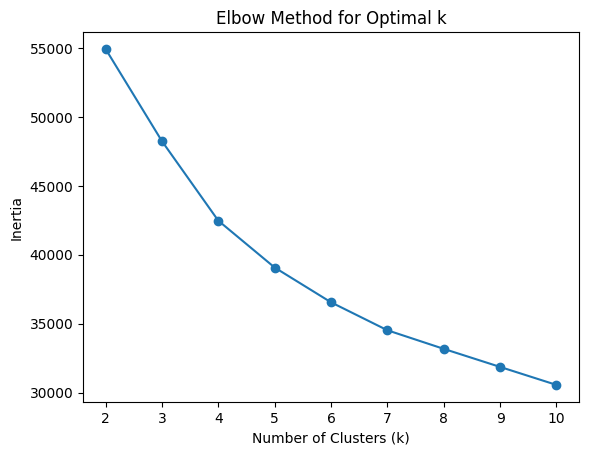

In [4]:
plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [5]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

silhouette_scores

[0.14239416102373612,
 0.16670489863913251,
 0.1878023969436726,
 0.1792097222911571,
 0.1893651986807222,
 0.1742439311356524,
 0.16263106334583907,
 0.1637404151044938,
 0.16999043295073243]

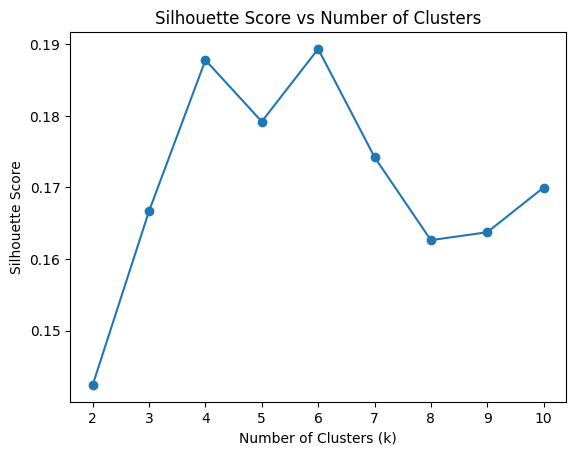

In [6]:
plt.figure()
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()

In [7]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

cluster_labels[:10]

array([1, 2, 2, 2, 0, 0, 0, 2, 0, 2], dtype=int32)

In [8]:
clustered_data = X_scaled.copy()
clustered_data["Cluster"] = cluster_labels

clustered_data.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Cluster
0,-1.009559,-0.439916,-0.654012,-1.277445,-3.054010,-0.854176,-0.885660,-0.828207,-1.321350,1
1,0.990532,-0.439916,-0.654012,0.351370,0.327438,-0.854176,-0.885660,0.371271,-1.321350,2
2,-1.009559,-0.439916,1.529024,0.799294,0.327438,-0.854176,-0.885660,-0.828207,-1.520755,2
3,-1.009559,-0.439916,-0.654012,-1.277445,0.327438,-0.854176,-0.885660,0.371271,0.373593,2
4,0.990532,-0.439916,-0.654012,1.410099,0.327438,-0.854176,1.129102,-0.828207,-0.457261,0


In [9]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(
    pca_components, columns=["PC1", "PC2"]
)
pca_df["Cluster"] = cluster_labels

pca_df.head()

,PC1,PC2,Cluster
0,-2.387541,-1.449674,1
1,-0.671749,-1.263082,2
2,-1.291325,-0.723689,2
3,0.075055,-1.456985,2
4,0.072630,0.728081,0


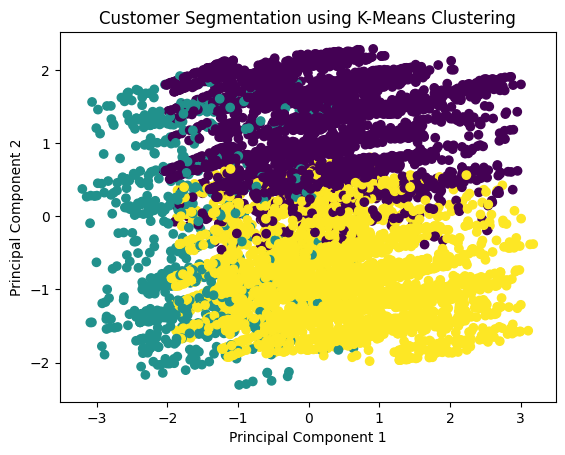

In [10]:
plt.figure()
plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["Cluster"]
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation using K-Means Clustering")
plt.show()

In [11]:
clustered_data["Cluster"].value_counts()

Cluster
2    3566
0    2795
1     682
Name: count, dtype: int64

In [12]:
clustered_data.to_csv("../Data/clustered_data.csv", index=False)
pca_df.to_csv("../Data/pca_clusters.csv", index=False)